# Los MiserAIbles Team

### Integrantes
Sorany Hincapie Salazar  
Brayan Montoya Osorio

## Exploración de los datos

In [1]:
import pandas as pd

path_to_data = '../data/challenge_data-18-ago.csv'

df = pd.read_csv(path_to_data, sep = ';')
df.head(10)

,title,abstract,group
0,Adrenoleukodystrophy: survey of 303 cases: bio...,Adrenoleukodystrophy ( ALD ) is a genetically ...,neurological|hepatorenal
1,endoscopy reveals ventricular tachycardia secrets,Research question: How does metformin affect c...,neurological
2,dementia and cholecystitis: organ interplay,Purpose: This randomized controlled study exam...,hepatorenal
3,The interpeduncular nucleus regulates nicotine...,Partial lesions were made with kainic acid in ...,neurological
4,guillain-barre syndrome pathways in leukemia,Hypothesis: statins improves stroke outcomes v...,neurological
5,Effects of suprofen on the isolated perfused r...,Although suprofen has been associated with the...,hepatorenal
6,atherosclerosis and lymphoma: vascular insights,Aim: To investigate aspirin effects on diabete...,cardiovascular
7,Potential therapeutic use of the selective dop...,The clinical utility of dopamine (DA) D1 recep...,neurological
8,The basal ganglia connection in epilepsy,Background: dementia affects cardiac patients ...,neurological
9,septum and peripheral artery disease: vascular...,Purpose: This observational study examined cal...,cardiovascular


Con la nube se puede: identificar patrones al encontrar palabras juntas con frecuencia. Es útil para visualizar rápidamente los temas e ideas clave de un texto.

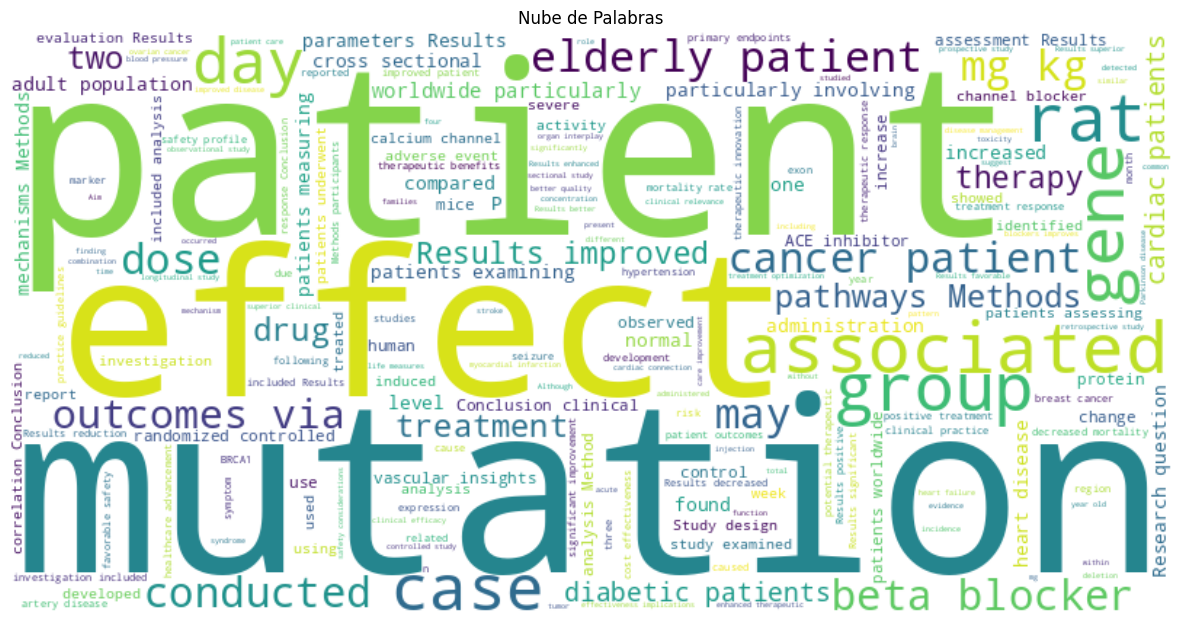

In [230]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

texto = df['title'] + " " + df['abstract']
text = " ".join(word for word in texto)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=800, height=400).generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras")
plt.show()

## Extracción de características con NLP

Pasos:
1. Tokenización.
2. Limpieza.
3. Lemmatización.
4. Filtrado de StopWords.
5. Vectorización a través de TF-IDF.

### Ejemplo de prueba con un registro del dataset siguiendo los pasos anteriores.

In [231]:
row_example =  df.iloc[0]['title'] + ' ' +  df.iloc[0]['abstract']
print(row_example)

Adrenoleukodystrophy: survey of 303 cases: biochemistry, diagnosis, and therapy. Adrenoleukodystrophy ( ALD ) is a genetically determined disorder associated with progressive central demyelination and adrenal cortical insufficiency . All affected persons show increased levels of saturated unbranched very-long-chain fatty acids , particularly hexacosanoate ( C26  0 ) , because of impaired capacity to degrade these acids . This degradation normally takes place in a subcellular organelle called the peroxisome , and ALD , together with Zellwegers cerebrohepatorenal syndrome , is now considered to belong to the newly formed category of peroxisomal disorders . Biochemical assays permit prenatal diagnosis , as well as identification of most heterozygotes . We have identified 303 patients with ALD in 217 kindreds . These patients show a wide phenotypic variation . Sixty percent of patients had childhood ALD and 17 % adrenomyeloneuropathy , both of which are X-linked , with the gene mapped to X

### 1. Tokenización:  
Dividir texto en palabras, oraciones o elementos pequeños. Para esto se usa la librería **nltk** y se descarga el modulo **punkt_tab**.

In [232]:
import nltk
nltk.download('punkt_tab')

def tokenize_text(text):
    return nltk.word_tokenize(text)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [233]:
# Ejemplo
tokens = tokenize_text(row_example)
print(tokens)

['Adrenoleukodystrophy', ':', 'survey', 'of', '303', 'cases', ':', 'biochemistry', ',', 'diagnosis', ',', 'and', 'therapy', '.', 'Adrenoleukodystrophy', '(', 'ALD', ')', 'is', 'a', 'genetically', 'determined', 'disorder', 'associated', 'with', 'progressive', 'central', 'demyelination', 'and', 'adrenal', 'cortical', 'insufficiency', '.', 'All', 'affected', 'persons', 'show', 'increased', 'levels', 'of', 'saturated', 'unbranched', 'very-long-chain', 'fatty', 'acids', ',', 'particularly', 'hexacosanoate', '(', 'C26', '0', ')', ',', 'because', 'of', 'impaired', 'capacity', 'to', 'degrade', 'these', 'acids', '.', 'This', 'degradation', 'normally', 'takes', 'place', 'in', 'a', 'subcellular', 'organelle', 'called', 'the', 'peroxisome', ',', 'and', 'ALD', ',', 'together', 'with', 'Zellwegers', 'cerebrohepatorenal', 'syndrome', ',', 'is', 'now', 'considered', 'to', 'belong', 'to', 'the', 'newly', 'formed', 'category', 'of', 'peroxisomal', 'disorders', '.', 'Biochemical', 'assays', 'permit', 'pr

### 2. Limpieza:
Eliminar caracteres especiales y convertir texto a minúsculas.

In [234]:
def clean_tokens(tokens):
    return [token.lower() for token in tokens if token.isalpha()]

In [235]:
# Ejemplo
cleaned_tokens = clean_tokens(tokens)
print(cleaned_tokens)

['adrenoleukodystrophy', 'survey', 'of', 'cases', 'biochemistry', 'diagnosis', 'and', 'therapy', 'adrenoleukodystrophy', 'ald', 'is', 'a', 'genetically', 'determined', 'disorder', 'associated', 'with', 'progressive', 'central', 'demyelination', 'and', 'adrenal', 'cortical', 'insufficiency', 'all', 'affected', 'persons', 'show', 'increased', 'levels', 'of', 'saturated', 'unbranched', 'fatty', 'acids', 'particularly', 'hexacosanoate', 'because', 'of', 'impaired', 'capacity', 'to', 'degrade', 'these', 'acids', 'this', 'degradation', 'normally', 'takes', 'place', 'in', 'a', 'subcellular', 'organelle', 'called', 'the', 'peroxisome', 'and', 'ald', 'together', 'with', 'zellwegers', 'cerebrohepatorenal', 'syndrome', 'is', 'now', 'considered', 'to', 'belong', 'to', 'the', 'newly', 'formed', 'category', 'of', 'peroxisomal', 'disorders', 'biochemical', 'assays', 'permit', 'prenatal', 'diagnosis', 'as', 'well', 'as', 'identification', 'of', 'most', 'heterozygotes', 'we', 'have', 'identified', 'pat

### 3. Lemmatización:  
Llevar palabras a su forma raíz.

Se va a usar Lemmatización en lugar de Stemming dado que se busca obtener resultados más precisos y significativos. Es probable que el Stemming pierda contexto gramatical o genere palabras inexistentes, mientras que la Lemmatización mantiene el significado de las palabras y es más preciso linguisticamente.

In [236]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')

def lemmatize_words(words, lemmatizer=None):
    if lemmatizer is None:
        lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...


[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [237]:
# Ejemplo
test_lemmatizer = WordNetLemmatizer()
lemmatized_words = lemmatize_words(cleaned_tokens, test_lemmatizer)
print(lemmatized_words)


['adrenoleukodystrophy', 'survey', 'of', 'case', 'biochemistry', 'diagnosis', 'and', 'therapy', 'adrenoleukodystrophy', 'ald', 'is', 'a', 'genetically', 'determined', 'disorder', 'associated', 'with', 'progressive', 'central', 'demyelination', 'and', 'adrenal', 'cortical', 'insufficiency', 'all', 'affected', 'person', 'show', 'increased', 'level', 'of', 'saturated', 'unbranched', 'fatty', 'acid', 'particularly', 'hexacosanoate', 'because', 'of', 'impaired', 'capacity', 'to', 'degrade', 'these', 'acid', 'this', 'degradation', 'normally', 'take', 'place', 'in', 'a', 'subcellular', 'organelle', 'called', 'the', 'peroxisome', 'and', 'ald', 'together', 'with', 'zellwegers', 'cerebrohepatorenal', 'syndrome', 'is', 'now', 'considered', 'to', 'belong', 'to', 'the', 'newly', 'formed', 'category', 'of', 'peroxisomal', 'disorder', 'biochemical', 'assay', 'permit', 'prenatal', 'diagnosis', 'a', 'well', 'a', 'identification', 'of', 'most', 'heterozygote', 'we', 'have', 'identified', 'patient', 'wit

### 4. Filtrado de StopWords

Se busca eliminar palabras que aporten poco significado, tales como: the, an, a, or, and. De igual manera se busca eliminar términos científicos y médicos, esto para reducir la dimensionalidad y procesar más rápido el dataset.

In [238]:
from nltk.corpus import stopwords

nltk.download('stopwords')

academic_medic_stopwords = {
        'abstract', 'paper', 'study', 'research', 'article', 'journal',
        'analysis', 'method', 'approach', 'technique', 'result', 'conclusion',
        'introduction', 'discussion', 'experimental', 'theoretical',
        'also', 'however', 'therefore', 'furthermore', 'moreover',
        'studies', 'report', 'review', 'evaluation', 'assessment', 'investigation', 
        'examination', 'observation', 'finding', 'findings', 'results', 'methods', 
        'methodology', 'patient', 'patients', 'subject', 'subjects', 'participant', 
        'participants', 'case', 'cases', 'group', 'groups', 'control', 'controls',
        'significant', 'significantly', 'statistical', 'statistically',
        'important', 'effective', 'successful', 'common', 'rare', 'typical',
        'normal', 'abnormal', 'positive', 'negative', 'high', 'low', 'increased', 'decreased'
    }

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [token for token in tokens if token not in stop_words and token not in academic_medic_stopwords]

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [239]:
# Ejemplo
filtered_tokens = remove_stopwords(lemmatized_words)
print(filtered_tokens)

['adrenoleukodystrophy', 'survey', 'biochemistry', 'diagnosis', 'therapy', 'adrenoleukodystrophy', 'ald', 'genetically', 'determined', 'disorder', 'associated', 'progressive', 'central', 'demyelination', 'adrenal', 'cortical', 'insufficiency', 'affected', 'person', 'show', 'level', 'saturated', 'unbranched', 'fatty', 'acid', 'particularly', 'hexacosanoate', 'impaired', 'capacity', 'degrade', 'acid', 'degradation', 'normally', 'take', 'place', 'subcellular', 'organelle', 'called', 'peroxisome', 'ald', 'together', 'zellwegers', 'cerebrohepatorenal', 'syndrome', 'considered', 'belong', 'newly', 'formed', 'category', 'peroxisomal', 'disorder', 'biochemical', 'assay', 'permit', 'prenatal', 'diagnosis', 'well', 'identification', 'heterozygote', 'identified', 'ald', 'kindred', 'show', 'wide', 'phenotypic', 'variation', 'sixty', 'percent', 'childhood', 'ald', 'adrenomyeloneuropathy', 'gene', 'mapped', 'neonatal', 'ald', 'distinct', 'entity', 'autosomal', 'recessive', 'inheritance', 'point', 'r

## Procesamiento de dataset:

Pipeline de tokenización, limpieza, lemmatización y filtrado para todo el dataset:

In [240]:
def nlp_pipeline(text):
    lemmatizer = WordNetLemmatizer()

    tokens = tokenize_text(text)
    cleaned_tokens = clean_tokens(tokens)
    lemmatized_words = lemmatize_words(cleaned_tokens, lemmatizer)
    filtered_words = remove_stopwords(lemmatized_words)
    return filtered_words

In [241]:
# Llamada al pipeline para todo el dataset
df['processed_text'] = (df['title'] + df['abstract']).apply(nlp_pipeline)
df.head(3)

,title,abstract,group,processed_text
0,Adrenoleukodystrophy: survey of 303 cases: bio...,Adrenoleukodystrophy ( ALD ) is a genetically ...,neurological|hepatorenal,"[adrenoleukodystrophy, survey, biochemistry, d..."
1,endoscopy reveals ventricular tachycardia secrets,Research question: How does metformin affect c...,neurological,"[endoscopy, reveals, ventricular, tachycardia,..."
2,dementia and cholecystitis: organ interplay,Purpose: This randomized controlled study exam...,hepatorenal,"[dementia, cholecystitis, organ, interplaypurp..."


Vectorización:

In [242]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_text'].apply(lambda x: ' '.join(x)))
X.shape

(3565, 12438)

# Selección de tokens

In [243]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import numpy as np
from deap import base, creator, tools, algorithms
import random

In [244]:
dfstr=df.copy()

Lista de tokens a string:

In [245]:
dfstr['processed_text'] = dfstr['processed_text'].apply(lambda x: " ".join(x))

Vectorizador para texto. De string a matriz sparse.

In [246]:
def vectorize_df(data,max_feature,min_,max_):
    tfidf_ = TfidfVectorizer(max_features=max_feature,min_df=min_,max_df=max_)
    data_v = tfidf_.fit_transform(data)
    return data_v,tfidf_

Evalúar, actualizar y seleccionar los tokens más representativos para la predicción de los modelos. Esto se hace a través de un algoritmo genético el cual itera sobre los tokens y calcula la precisión obtenida de la lista de tokens preseleccionados.

In [247]:
def fitness_function(individual):
    selected_indices = [i for i, bit in enumerate(individual) if bit == 1]#Lista de 1 y 0s que indican token relevante a entrenar.
    if len(selected_indices) == 0:
        return 0.,  #Evita entrenamiento con 0 características.

    clf = lgb.LGBMClassifier(
        n_estimators=50,
        max_depth=5,
        min_child_samples=5,
        min_gain_to_split=0.0,
        n_jobs=-1,
        verbosity=-1
    )

    #Sparse matrix (n_muestras, n_features). Toma las características de acuerdo a los índices(col) indicados; conserva número de filas.
    X_train_sel = X_train[:, selected_indices]
    X_test_sel  = X_test[:, selected_indices]

    #LightGBM: acepta matrices sparse.
    clf.fit(X_train_sel, y_train, feature_name=[feature_names[i] for i in selected_indices])

    acc = clf.score(X_test_sel, y_test)#Métrica de presición.
    return acc,

In [248]:
texts= dfstr['title'] + " " + dfstr['abstract']
X_abstract,tfidf_abstract=vectorize_df(texts,15000,3,0.8)

feature_names = np.array(tfidf_abstract.get_feature_names_out())#Obtiene token/palabra con las que se entrena el modelo LGBM.
                    #La posición del array feature_names indica el índice de Xcarac(subset de tokens en región media).


n_features = len(feature_names)
Xcarac = X_abstract[:, :n_features]

y = df['group']#Etiquetas.

X_train, X_test, y_train, y_test = train_test_split(Xcarac, y, test_size=0.2, random_state=42, stratify=y)

In [249]:
# Configuración DEAP.
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=n_features)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", fitness_function)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

/usr/local/python/3.12.1/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/python/3.12.1/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [250]:
pop_size = 12
n_gen = 6

population = toolbox.population(n=pop_size)

algorithms.eaSimple(
    population,
    toolbox,
    cxpb=0.5,
    mutpb=0.2,
    ngen=n_gen
)

#Mejor individuo.
best_ind = tools.selBest(population, 1)[0]
selected_features_final = [feature_names[i] for i, bit in enumerate(best_ind) if bit == 1]#tokens más significativos según el módelo

print("Número de tokens seleccionados:", len(selected_features_final))
print("Tokens seleccionados:", selected_features_final)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warni

gen	nevals
0  	12    


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warni

1  	5     


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warni

2  	8     


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warni

3  	7     


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warni

4  	11    


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warni

5  	7     


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warni

6  	7     
Número de tokens seleccionados: 3237
Tokens seleccionados: ['00', '000', '0006', '001', '002', '004', '01', '011', '015', '021', '022', '03', '035', '04', '049', '05', '06', '09', '100', '1000', '101', '102', '105', '10th', '111', '112', '113', '114', '115', '118', '11q22', '12', '120', '121', '122', '124', '128', '13', '131i', '132', '135', '138', '139', '141', '143', '149', '14c', '153', '155', '157', '158', '162', '163', '164', '170', '172', '175', '176', '177', '178', '17q', '17q21', '18', '180', '181', '184', '185delag', '186', '19', '190', '196', '1967', '197', '1971', '1986', '1987', '199', '1992', '1994', '1996', '1999', '1g', '20', '2001', '2005', '2008', '2009', '201', '2011', '202', '204', '205', '206', '207', '210', '212', '213', '215', '216', '218', '220', '223', '224', '225', '226', '227', '228', '230', '233', '234', '236', '24', '240', '242', '247', '248', '25', '250', '253', '255', '256', '258', '25mg', '262', '263', '264', '265', '266', '270', '272', '274', 

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [251]:
#Selected_features_final: tokens que DEAP seleccionó
vocab = set(tfidf_abstract.get_feature_names_out())
valid_tokens = [t for t in selected_features_final if t in vocab]
print("Tokens válidos en vocabulario:",len(valid_tokens))
print("Tokens seleccionados por DEAP:",len(selected_features_final))

Tokens válidos en vocabulario: 3237
Tokens seleccionados por DEAP: 3237


In [252]:
token_to_index = {t: i for i, t in enumerate(tfidf_abstract.get_feature_names_out())}#Crea un diccionario con todos los tokens que el vectorizador(TF-IDF) identificó.
selected_indices = [token_to_index[t] for t in valid_tokens]#Asigna un índice a cada token. 

X_final = X_abstract[:, selected_indices]
print("Tamaño de la matriz final:", X_final.shape)

Tamaño de la matriz final: (3565, 3237)


## Entrenamiento de modelos
Se decide tomar un enfoque basado en machine learning, dado que se desea aprovechar las diferentes herramientas presentes en el lenguaje Python, como bibliotecas de inteligencia artificial, de procesamiento de lenguaje natural, de visualización de imágenes entre otras. Además de poder intervenir fácilmente los modelos de clasificación.

No se opta por usar una solución basada en IA Generativa, dado que no hay garantía de que los modelos base hayan sido entrenados con suficiente literatura médica actualizada, además se desea evitar costos y posibles interrupciones en los servicios.

Preparación de etiquetas:

In [253]:
df['label_list'] = df['group'].apply(lambda x: x.split('|'))
df.head(3)

,title,abstract,group,processed_text,label_list
0,Adrenoleukodystrophy: survey of 303 cases: bio...,Adrenoleukodystrophy ( ALD ) is a genetically ...,neurological|hepatorenal,"[adrenoleukodystrophy, survey, biochemistry, d...","[neurological, hepatorenal]"
1,endoscopy reveals ventricular tachycardia secrets,Research question: How does metformin affect c...,neurological,"[endoscopy, reveals, ventricular, tachycardia,...",[neurological]
2,dementia and cholecystitis: organ interplay,Purpose: This randomized controlled study exam...,hepatorenal,"[dementia, cholecystitis, organ, interplaypurp...",[hepatorenal]


Se usa MultiLabelBinarizer para convertir las etiquetas en un formato adecuado para el entrenamiento de los modelos.

In [254]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['label_list'])
y

array([[0, 1, 1, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       ...,
       [1, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 1]], shape=(3565, 4))

División de datos en entrenamiento y prueba

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [256]:
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack

original_columns = ['title', 'abstract']

encoder = OneHotEncoder(handle_unknown='ignore')
X_original_sparse = encoder.fit_transform(dfstr[original_columns])

X_total = hstack([X_final, X_original_sparse])

### Light GBM

In [271]:
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import f1_score, hamming_loss
#Clasificación con tokens seleccionados y columnas title y abstract.
X_ = X_total
y_ = y
X_trainlgbm, X_testlgbm, y_trainlgbm, y_testlgbm = train_test_split(
    X_, y_, test_size=0.2, random_state=42, stratify=y
)

clf = OneVsRestClassifier(
    lgb.LGBMClassifier(n_estimators=100, max_depth=7, n_jobs=-1, verbosity=-1)
)
clf.fit(X_trainlgbm, y_trainlgbm)
y_predlg = clf.predict(X_testlgbm)

#Métricas
f1 = f1_score(y_testlgbm, y_predlg, average='micro')
hamming = hamming_loss(y_testlgbm, y_predlg)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [272]:
print(classification_report(y_test, y_predlg))

              precision    recall  f1-score   support

           0       0.39      0.35      0.37       260
           1       0.34      0.24      0.28       228
           2       0.50      0.52      0.51       338
           3       0.21      0.15      0.17       130

   micro avg       0.41      0.35      0.38       956
   macro avg       0.36      0.31      0.33       956
weighted avg       0.39      0.35      0.37       956
 samples avg       0.40      0.37      0.36       956



/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


### Máquinas de Soporte Vectorial (SVM)

In [259]:
from sklearn.svm import SVC

svm_clf = LinearSVC(max_iter=1000)
multi_svm = OneVsRestClassifier(
    SVC(probability=True, kernel="linear", random_state=42)
    )

multi_svm.fit(X_train, y_train)

y_pred_svm = multi_svm.predict(X_test)
print(classification_report(y_test, y_pred_svm, target_names = mlb.classes_))

                precision    recall  f1-score   support

cardiovascular       0.98      0.86      0.92       260
   hepatorenal       0.99      0.75      0.85       228
  neurological       0.87      0.88      0.87       338
   oncological       1.00      0.67      0.80       130

     micro avg       0.94      0.81      0.87       956
     macro avg       0.96      0.79      0.86       956
  weighted avg       0.95      0.81      0.87       956
   samples avg       0.94      0.87      0.89       956



/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Gráfica de matriz de reporte de clasificación usando V0.   
Prompt utilizado: Grafica de una forma clara esta reporte de clasificación en python.

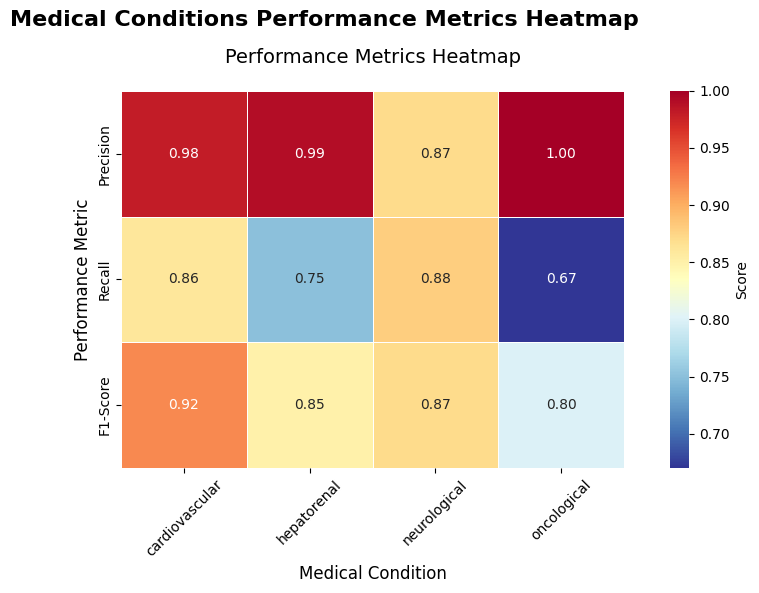


PERFORMANCE METRICS HEATMAP SUMMARY
Condition       Precision  Recall   F1-Score  
--------------------------------------------------
cardiovascular  0.98       0.86     0.92      
hepatorenal     0.99       0.75     0.85      
neurological    0.87       0.88     0.87      
oncological     1.00       0.67     0.80      


In [264]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

data = {
    'Class': ['cardiovascular', 'hepatorenal', 'neurological', 'oncological'],
    'Precision': [0.98, 0.99, 0.87, 1.00],
    'Recall': [0.86, 0.75, 0.88, 0.67],
    'F1-Score': [0.92, 0.85, 0.87, 0.80],
    'Support': [260, 228, 338, 130]
}

df = pd.DataFrame(data)

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
fig.suptitle('Medical Conditions Performance Metrics Heatmap', fontsize=16, fontweight='bold')

# Create heatmap of performance metrics
metrics_data = df[['Precision', 'Recall', 'F1-Score']].T
sns.heatmap(metrics_data, 
            annot=True, 
            fmt='.2f', 
            cmap='RdYlBu_r', 
            xticklabels=df['Class'], 
            yticklabels=['Precision', 'Recall', 'F1-Score'],
            ax=ax, 
            cbar_kws={'label': 'Score'},
            square=True,
            linewidths=0.5)

ax.set_title('Performance Metrics Heatmap', fontsize=14, pad=20)
ax.tick_params(axis='x', rotation=45)
ax.set_xlabel('Medical Condition', fontsize=12)
ax.set_ylabel('Performance Metric', fontsize=12)

plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("PERFORMANCE METRICS HEATMAP SUMMARY")
print("="*50)
print(f"{'Condition':<15} {'Precision':<10} {'Recall':<8} {'F1-Score':<10}")
print("-" * 50)
for _, row in df.iterrows():
    print(f"{row['Class']:<15} {row['Precision']:<10.2f} {row['Recall']:<8.2f} {row['F1-Score']:<10.2f}")


### XGBoost

In [260]:
import xgboost as xgb
clf_xgb = OneVsRestClassifier(xgb.XGBClassifier(objective='binary:logistic', n_estimators=10,
                            seed=123))

clf_xgb.fit(X_train, y_train)
preds_xgb = clf_xgb.predict(X_test)

print(classification_report(y_test, preds_xgb, target_names = mlb.classes_))

                precision    recall  f1-score   support

cardiovascular       0.97      0.83      0.90       260
   hepatorenal       0.96      0.67      0.79       228
  neurological       0.87      0.83      0.85       338
   oncological       0.95      0.75      0.84       130

     micro avg       0.93      0.78      0.85       956
     macro avg       0.94      0.77      0.84       956
  weighted avg       0.93      0.78      0.85       956
   samples avg       0.87      0.82      0.82       956



/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


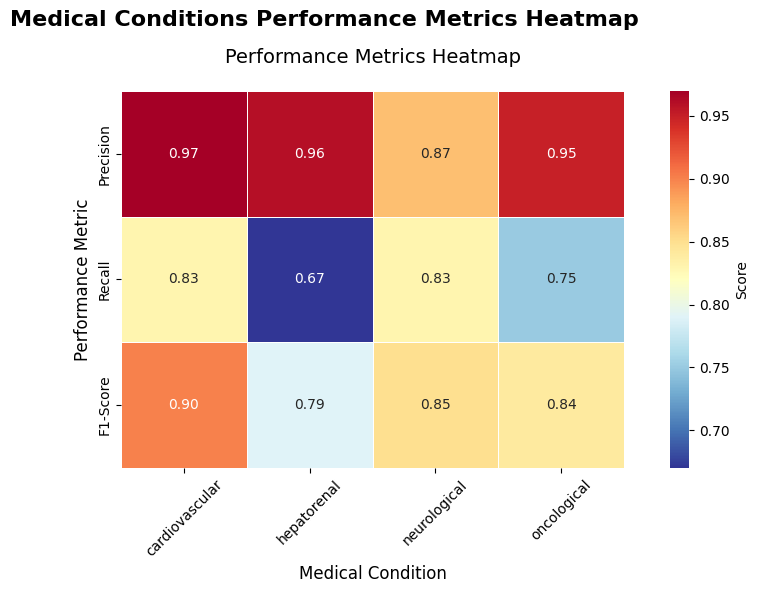


PERFORMANCE METRICS HEATMAP SUMMARY
Condition       Precision  Recall   F1-Score  
--------------------------------------------------
cardiovascular  0.97       0.83     0.90      
hepatorenal     0.96       0.67     0.79      
neurological    0.87       0.83     0.85      
oncological     0.95       0.75     0.84      


In [266]:
data = {
    'Class': ['cardiovascular', 'hepatorenal', 'neurological', 'oncological'],
    'Precision': [0.97, 0.96, 0.87, 0.95],
    'Recall': [0.83, 0.67, 0.83, 0.75],
    'F1-Score': [0.90, 0.79, 0.85, 0.84],
    'Support': [260, 228, 338, 130]
}

df = pd.DataFrame(data)

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
fig.suptitle('Medical Conditions Performance Metrics Heatmap', fontsize=16, fontweight='bold')

# Create heatmap of performance metrics
metrics_data = df[['Precision', 'Recall', 'F1-Score']].T
sns.heatmap(metrics_data, 
            annot=True, 
            fmt='.2f', 
            cmap='RdYlBu_r', 
            xticklabels=df['Class'], 
            yticklabels=['Precision', 'Recall', 'F1-Score'],
            ax=ax, 
            cbar_kws={'label': 'Score'},
            square=True,
            linewidths=0.5)

ax.set_title('Performance Metrics Heatmap', fontsize=14, pad=20)
ax.tick_params(axis='x', rotation=45)
ax.set_xlabel('Medical Condition', fontsize=12)
ax.set_ylabel('Performance Metric', fontsize=12)

plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("PERFORMANCE METRICS HEATMAP SUMMARY")
print("="*50)
print(f"{'Condition':<15} {'Precision':<10} {'Recall':<8} {'F1-Score':<10}")
print("-" * 50)
for _, row in df.iterrows():
    print(f"{row['Class']:<15} {row['Precision']:<10.2f} {row['Recall']:<8.2f} {row['F1-Score']:<10.2f}")


## Votación ponderada.

In [261]:
#Probabilidades.
probs_xgb = clf_xgb.predict_proba(X_test)
probs_lgb = clf.predict_proba(X_testlgbm)
probs_svm = multi_svm.predict_proba(X_test)

f1_xgb = f1_score(y_test, clf_xgb.predict(X_test), average='micro')
f1_lgb = f1_score(y_test, clf.predict(X_testlgbm), average='micro')
f1_svm = f1_score(y_test, multi_svm.predict(X_test), average='micro')


weights = np.array([f1_xgb, f1_lgb, f1_svm])
weights = weights / weights.sum()

#Votación ponderada.
combined_probs = probs_xgb * weights[0] + probs_lgb * weights[1] + probs_svm * weights[2]
y_predcom = (combined_probs >= 0.7).astype(int)#Umbral de clasificación según probabilidad combinada.

#Métricas multilabel.
f1_combined = f1_score(y_test, y_predcom, average='micro')
print("F1 micro combinado:", f1_combined)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


F1 micro combinado: 0.7672634271099744


In [262]:
report = classification_report(y_test, y_predcom, output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)
hamming = hamming_loss(y_test, y_predcom)
print("-----------------------------")
print("Hamming loss:", hamming)#Proporción de etiquetas incorrectas.

              precision    recall  f1-score  support
0              1.000000  0.680769  0.810069    260.0
1              1.000000  0.587719  0.740331    228.0
2              0.964912  0.650888  0.777385    338.0
3              1.000000  0.530769  0.693467    130.0
micro avg      0.986842  0.627615  0.767263    956.0
macro avg      0.991228  0.612536  0.755313    956.0
weighted avg   0.987595  0.627615  0.766025    956.0
samples avg    0.794530  0.685601  0.720056    956.0
-----------------------------
Hamming loss: 0.1276297335203366


/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
